In [1]:
# Do the necessary imports
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

In [11]:
# this block only needs to be run once

from qiskit import IBMQ
# IBMQ.save_account('2295eb6b30c26aecc9b9ecb0677b769a8e3a606479658709d13cd7301349ce07965760ac5eeb2fbb1e9cb741bdfc881058301125aaa6e1a703beedc07bb9db94')

provider = IBMQ.load_account()
# backend = provider.get_backend('ibmq_quito')

In [12]:
# superposition, simulate all vectors in R^n

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [4]:
# diffuser

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [5]:
# oracle


from qiskit.circuit.library import MCMT

def multi_control_z(qubits):
    qc = QuantumCircuit()

    # for qubit in range(n_quibit - 1):

    qc = MCMT('cz',2,1)
    
    oracle_ex3 = qc.to_gate()
    oracle_ex3.name = "U$_\omega$"


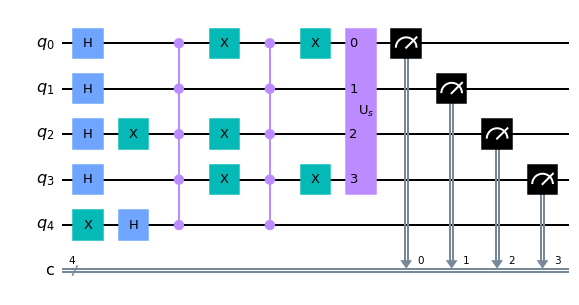

In [53]:
grover_circuit = QuantumCircuit(5,4)

grover_circuit.x(4)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3,4])


grover_circuit.x(2)
multi_1101 = MCMT('cz', 4,1)
grover_circuit.compose(multi_1101, qubits=[0, 1, 2, 3, 4], inplace=True)
grover_circuit.x(2)


grover_circuit.x(0)
grover_circuit.x(3)
multi_0110 = MCMT('cz', 4,1)
grover_circuit.compose(multi_0110, qubits=[0, 1, 2, 3, 4], inplace=True)
grover_circuit.x(0)
grover_circuit.x(3)


grover_circuit.append(diffuser(4), [0,1,2,3])
grover_circuit.measure(0,0)
grover_circuit.measure(1,1)
grover_circuit.measure(2,2)
grover_circuit.measure(3,3)


grover_circuit.draw('mpl')

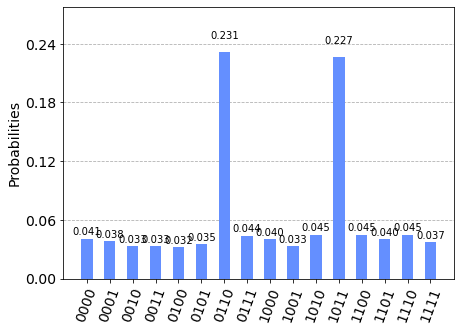

In [54]:
# from qiskit import Aer
# from qiskit.utils import QuantumInstance
# from qiskit.tools.monitor import job_monitor
# from qiskit.providers.ibmq import least_busy

# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
#                                    not x.configuration().simulator and x.status().operational==True))
# print("least busy backend: ", backend)

# transpiled_grover_circuit = transpile(grover_circuit, backend, optimization_level=3)
# job = backend.run(transpiled_grover_circuit)
# job_monitor(job, interval=2)

# # Get the results from the computation
# results = job.result().get_counts(grover_circuit)
# plot_histogram(results)

aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)